In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
data = pd.read_excel('housing.xlsx')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

There are some missing values in column total_bedrooms
Use mean Imputer

In [6]:
data.total_bedrooms = data.total_bedrooms.fillna(data.total_bedrooms.mean())

In [7]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [8]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [11]:
corr = data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot: >

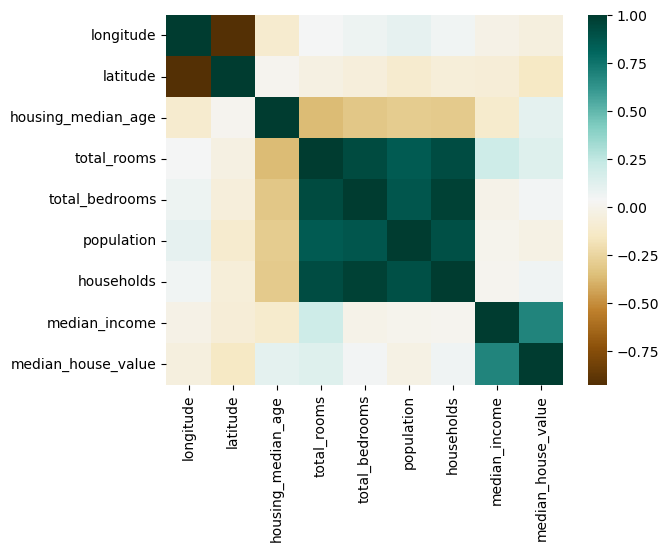

In [12]:
sns.heatmap(corr, cmap = 'BrBG')

Almost all the inputs/independent variabels show meaningful correlation witht he houing prices

In [13]:
# check uniqie vlaues for categorical variable 'ocean proximity'
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
# # Encode label ocean_proximity
encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data.ocean_proximity)
data.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [16]:
X = data.drop('median_house_value', axis=1)
Y = data.median_house_value

In [17]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [18]:
Y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
print(X_train.size)
print(X_test.size)
print(Y_train.size)
print(Y_test.size)

148608
37152
16512
4128


###### 1. Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(X_train, Y_train)
Y_predLR = lrModel.predict(X_test)
rmsLR = np.sqrt(mean_squared_error(Y_test, Y_predLR))
print(rmsLR)
r2ScoreLR = r2_score(Y_test, Y_predLR)
print(r2ScoreLR)

69550.71285648773
0.6392866585426098


###### 2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtModel = DecisionTreeRegressor()
dtModel.fit(X_train, Y_train)
Y_predDT = dtModel.predict(X_test)
rmsDT = np.sqrt(mean_squared_error(Y_test, Y_predDT))
print(rmsDT)
r2ScoreDT = r2_score(Y_test, Y_predDT)
print(r2ScoreDT)

69821.45830212631
0.6364728388823169


###### 3  . Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor()
rfModel.fit(X_train, Y_train)
Y_predRF = rfModel.predict(X_test)
rmsRF = np.sqrt(mean_squared_error(Y_test, Y_predRF))
print(rmsRF)
r2ScoreRF = r2_score(Y_test, Y_predRF)
print(r2ScoreRF)

49108.59974451562
0.8201650342838838


###### 4. Linear Regression with one variable

Use median income as independant variable and and medain house income as dependant variable

In [48]:
X_train2 = pd.DataFrame(X_train.median_income)
X_test2 = pd.DataFrame(X_test.median_income)

In [49]:
print(X_train2.shape)
print(type(X_train2))
X_train2.head()

(16512, 1)
<class 'pandas.core.frame.DataFrame'>


,median_income
17789,3.7143
17960,3.9417
16013,5.6787
11421,6.3749
10255,3.5667


In [55]:
lr = LinearRegression()
lr.fit(X_train2, Y_train)
y_pred = lr.predict(X_test2)
rms = np.sqrt(mean_squared_error(Y_test, y_pred))
print(rms)
r2Score = r2_score(Y_test, y_pred)
print(r2Score)

84601.0297061149
0.46628386502456587
